# Analysis of Just Eat Cycles data - open dataset of bike rental company

In this notebook, I analyzed real world dataset acquired on https://edinburghcyclehire.com/. First part describes basic statistics of the data, the following section provides answers for these task and questions:
    
    1) Identify the most frequent stations
    2) Identify active and unactive stations
    3) Identify stations having possible surplus or lack of bikes to rent
    4) Calculate distances between particular stations
    5) What is the usual timespan of bike trip ?
    6) Inspect demand for bikes over company lifetime
    7) Identify causes of demand's volatility
    8) Inspect the effect of weather on demand for bikes
    9) Do people tend to rent bike at the weekend more likely than during the rest of the week ?
    10) Identify the busiest rental stations on the map of Edinburgh
    11) Inspect the demand for bikes throughout the day
    

## Importing useful libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sqlalchemy
pd.options.mode.chained_assignment = None  # default='warn'
from scipy.stats import iqr

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

## Loading the dataset

At first, we need to get our data. The dataset is available at database, thus to load data into our workspace we will use SQL query. In this case, Python uses sqlalchemy library to provide communication with database. To avoid connecting to the database every time the code from this notebook runs, "bikes.csv" file is created for further handling the data.

In [2]:
# ## # Load data

# conn_string = "mysql+pymysql://student:p7@vw7MCatmnKjy7@data.engeto.com/data"
# alchemy_conn = sqlalchemy.create_engine(conn_string)

# query = """select * from edinburgh_bikes"""
# df = pd.read_sql(query, alchemy_conn)
# df.to_csv('bikes.csv')

Let's load the data into DataFrame. Since there are two columns containing dates, we can use date parser to create datetime type variables simultaneously. Column named "Unnamed:0" has no use, so it is dropped in the following step.

In [3]:
df = pd.read_csv('bikes.csv', parse_dates=['started_at','ended_at'])
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653
1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284
2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116
3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385
4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340981,2020-10-30 23:27:35,2020-10-30 23:38:40,665,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033
340982,2020-10-30 23:33:50,2020-10-30 23:40:02,372,1798,Chambers Street,Outside National Museum,55.947600,-3.188920,1814,Abbeyhill,Near Abbey Mount,55.955248,-3.172216
340983,2020-10-30 23:38:57,2020-10-30 23:43:33,275,1028,Hunter Square,In Hunter Square next to Tron Kirk,55.949798,-3.187795,1019,Grassmarket,West end of Grassmarket,55.947097,-3.197246
340984,2020-10-30 23:41:26,2020-10-30 23:50:44,557,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,259,St Andrew Square,North East corner,55.954906,-3.192444


## Descriptive statistics and basic exploration

Using .info() method and .dtypes attribute provide useful information about the DataFrame. Columns "started_at" and "ended_at" are datetime objects, as we explicitly stated in the importing phase. Variables we would guess to be numeric seem to have the numeric values and most likely "text based" variables are assigned to object Dtype, representing a string.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340986 entries, 0 to 340985
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   started_at                 340986 non-null  datetime64[ns]
 1   ended_at                   340986 non-null  datetime64[ns]
 2   duration                   340986 non-null  int64         
 3   start_station_id           340986 non-null  int64         
 4   start_station_name         340986 non-null  object        
 5   start_station_description  338142 non-null  object        
 6   start_station_latitude     340986 non-null  float64       
 7   start_station_longitude    340986 non-null  float64       
 8   end_station_id             340986 non-null  int64         
 9   end_station_name           340986 non-null  object        
 10  end_station_description    337891 non-null  object        
 11  end_station_latitude       340986 non-null  float64 

In [5]:
df.dtypes

started_at                   datetime64[ns]
ended_at                     datetime64[ns]
duration                              int64
start_station_id                      int64
start_station_name                   object
start_station_description            object
start_station_latitude              float64
start_station_longitude             float64
end_station_id                        int64
end_station_name                     object
end_station_description              object
end_station_latitude                float64
end_station_longitude               float64
dtype: object

The next step would be checking missing values. As we can see, there nothing missing except of "description" variables. I didn't find information given by these variables useful, so these missing values are not handled. Running .describe() method shows a table, containing descriptive statistics of each numerical variable of provided data. ("start_station_id" and "end_station_id" are rather categorical variables, so displayed statistics of these two columns do not make much sence.)

We can say the dataset is relatively clean, since there are no need to convert object types, handle missing values, etc.

In [6]:
df.isna().any()

started_at                   False
ended_at                     False
duration                     False
start_station_id             False
start_station_name           False
start_station_description     True
start_station_latitude       False
start_station_longitude      False
end_station_id               False
end_station_name             False
end_station_description       True
end_station_latitude         False
end_station_longitude        False
dtype: bool

In [7]:
df.describe()

,duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude
count,3.409860e+05,340986.000000,340986.000000,340986.000000,340986.000000,340986.000000,340986.000000
mean,2.061247e+03,873.602186,55.950954,-3.197067,912.859499,55.952805,-3.196056
std,8.703688e+03,657.828175,0.013604,0.039233,664.571468,0.016303,0.041459
min,6.100000e+01,171.000000,55.908404,-3.407156,171.000000,53.395525,-3.407156
25%,6.200000e+02,259.000000,55.940238,-3.207964,262.000000,55.941791,-3.208070
50%,1.147000e+03,862.000000,55.948949,-3.192444,880.000000,55.951501,-3.191890
75%,2.512000e+03,1728.000000,55.959410,-3.180986,1728.000000,55.962642,-3.176686
max,1.373043e+06,2268.000000,55.992957,-3.058307,2268.000000,55.992957,-2.990138


## 1) Identify the most frequent stations

For this task, we will use categorical variables only, represented by each station's id.

In [8]:
# only data needed
df2 = df[['start_station_id', 'end_station_id']]
df2

,start_station_id,end_station_id
0,247,259
1,259,262
2,262,250
3,255,254
4,255,253
...,...,...
340981,1051,1051
340982,1798,1814
340983,1028,1019
340984,358,259


First idea how to deal with such problem was to count the number of occurence of each station in our dataset. This would be done for both start and end stations separatedly using .value_counts() method on each column. Then, these grouped columns would be added. As we can see, this is not the best way - apparently, there are few stations from "start_station_id" which are missing in "end_station_id" and vice versa.

In [9]:
#add corresponding occurences to each station
start_st_counts = (df2['start_station_id']
                   .value_counts()
                   .sort_index()
                  ) 
end_st_counts = (df2['end_station_id']
                 .value_counts()
                 .sort_index()
                )

occupance = start_st_counts + end_st_counts
occupance.sort_values()

1740        3.0
241         5.0
1057        8.0
299         8.0
1056        9.0
         ...   
250     19619.0
265     24086.0
242         NaN
280         NaN
1857        NaN
Length: 200, dtype: float64

In [10]:
df2.isna().sum()

start_station_id    0
end_station_id      0
dtype: int64

In [11]:
set(df2['start_station_id'].unique()).symmetric_difference(set(df2['end_station_id'].unique())) 

{242, 280, 1857}

The problem above is solved by adding both inspected columns "under each other" and then performing the value counting.
As we can see, the most frequent used stations have reported around 20000 visits throughout company's lifetime.

In [12]:
overall_freq = (df2['start_station_id']
                .append(df2['end_station_id'])
                .value_counts()
                .sort_values()
               )
overall_freq

1857        1
242         2
280         3
1740        3
241         5
        ...  
259     17315
248     17671
1728    18127
250     19619
265     24086
Length: 200, dtype: int64

## 2) Identify active and unactive stations

I assume stations to be unactive as they are not meeting given activity threshold. We are also looking at part of the complete dataset only, filtered by the time - so the "actual" activity is assumed. Thus, the data used in this part are describing just the recent year (2020).

In [13]:
df1 = df[['started_at','ended_at','start_station_id', 'end_station_id']]
df1 = df1[df1['started_at'].dt.year > 2019]

Grouping the data by the station_id proved useful, followed by .count() aggregation.

In [14]:
df1_start = (df1[['started_at', 'start_station_id']]
             .rename(columns={'started_at':'activity_at', 'start_station_id':'station_id'})
            )
df1_end = (df1[['ended_at', 'end_station_id']]
           .rename(columns={'ended_at':'activity_at', 'end_station_id':'station_id'})
          )

df_total = df1_start.append(df1_end)

df_total = df_total.groupby(['station_id']).count().sort_values('activity_at')
df_total

,activity_at
station_id,
299,1
1857,1
1040,6
1724,8
1030,12
...,...
1024,10665
250,11217
265,12848


As we can see, the comparison between minimal, maximal and measurements of central tendencies shows that the underlying distribution could be skewed by possible outliers. After checking the histogram below of activity variable, the assumption was proved. 

To identify the unactive stations, I decided to put the "activity threshold" on 10th percentile of activity variable. I also checked the most active stations correspondingly, as those exceeding the 90th percentile. It could be useful to considerate the idea of increasing the capacity of the stations reporting high activity and possible closing of ones on the opposite side of the spectrum.

In [15]:
df_total.describe()

,activity_at
count,119.000000
mean,3464.571429
std,3150.146078
min,1.000000
25%,1154.500000
50%,2795.000000
75%,4942.000000
max,17569.000000


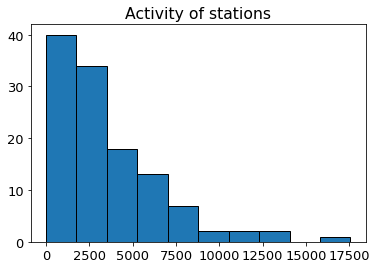

In [16]:
common_kwargs = {'edgecolor':'black', 'grid':False}

fig, ax = plt.subplots()
df_total.hist('activity_at', bins=10, ax=ax, **common_kwargs)
ax.set_title('Activity of stations')
plt.show()

The less active stations:

In [17]:
df_total[df_total['activity_at'] < df_total.quantile(.10).values[0]]

,activity_at
station_id,
299,1
1857,1
1040,6
1724,8
1030,12
876,12
1041,16
1031,16
1723,19


The most active stations:

In [18]:
df_total[df_total['activity_at'] > df_total.quantile(.910).values[0]]

,activity_at
station_id,
1767,7342
1769,7342
259,7373
262,7420
1722,10383
358,10495
1024,10665
250,11217
265,12848


## 3) Identify stations having possible surplus or lack of bikes to rent

The first step for this task was to create the set of all unique stations of our company. After that, this set is set as an index of a new (empty at first) DataFrame.

In [19]:
start3 = df2['start_station_id'].unique()
end3 = df2['end_station_id'].unique()
all_stations = np.array(list(set(start3).union(set(end3))))
df3 = pd.DataFrame(index=all_stations)
df3

""
1024
1025
1026
1027
1028
...
982
991
1017
1018


Then we create two DataFrames, containing activity counts on each station:

In [20]:
start3 = (df2['start_station_id'].value_counts()).to_frame()
end3 = (df2['end_station_id'].value_counts()).to_frame()

The next step would be joining these two columns to the epmty DataFrame, having all the stations as an index. .join method uses left join operation by default, so we can be assured about keeping all the rows from the leftmost dataframe (the one with all stations).

In [21]:
df3 = df3.join(start3)
df3 = df3.join(end3)
df3.rename(columns={'start_station_id': 'start_count', 'end_station_id': 'end_count'}, inplace=True)

This way a few missing values were created in joined collumns. Following steps will treat that by replacing NaN by zeros:

In [22]:
df3[df3['start_count'].isna()]

,start_count,end_count
242,NaN,2.0
280,NaN,3.0


In [23]:
df3[df3['end_count'].isna()]

,start_count,end_count
1857,1.0,NaN


In [24]:
df3.fillna(0, inplace=True)

Now, let's go evaluate potential surpluses and lacks of bikes at our stations. We can assume that as the customers rents a bike at particular station, he cycles away from the station, taking out one bike from the total bike collection there. Opposite effect stands for arriving at the end station - cutomer add's one more bike to the total count of bikes at the end station. 

Since we have visits grouped by particular stations, and those visits are represented as total visit counts at start and end stations separately, it makes sence to subtract start station visits from end station visits of corresponding station.

From this result, we can see that there are few stations having both strong lack and surplus of bikes. However, after checking the stats and histogram, we can say that most of the stations are quite balanced, having the same bike outflow and inflow. 

When comparing ballance Series below with most frequently visited stations, we can see that for example the station 248 is likely to have lack of bikes. This fact could mean that this station is the most probable location of the end station. Maybe it could be useful to provide some additional sevices there - drink or snack stall for example. Due to the traffic at this station, I think it could be usual routine to pick large amount of bikes there and then redistributing them back to  stations having the most significant lack of bikes.

In [25]:
df3['balance'] = -df3['start_count'] + df3['end_count']

In [26]:
df3['balance'].sort_values()

248    -4327.0
259    -3429.0
247    -2586.0
189    -2382.0
260    -2204.0
         ...  
262     1893.0
1728    2055.0
1824    2344.0
358     2772.0
250     3339.0
Name: balance, Length: 200, dtype: float64

In [27]:
df3['balance'].describe()

count     200.000000
mean        0.000000
std       767.716296
min     -4327.000000
25%       -53.250000
50%         4.500000
75%       135.000000
max      3339.000000
Name: balance, dtype: float64

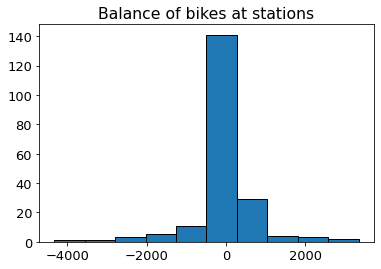

In [28]:
fig, ax = plt.subplots()
df3['balance'].hist(bins=10, ax=ax, **common_kwargs)
plt.title('Balance of bikes at stations')
plt.show()

## 4) Calculate distances between particular stations

To calculate distance between particular stations, following variables are used:

In [29]:
df4 = df[['start_station_id','end_station_id','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']]
df4

,start_station_id,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,247,259,55.952335,-3.207101,55.954728,-3.192653
1,259,262,55.954749,-3.192774,55.962804,-3.196284
2,262,250,55.962804,-3.196284,55.977638,-3.174116
3,255,254,55.922001,-3.176902,55.923479,-3.175385
4,255,253,55.922001,-3.176902,55.923202,-3.171646
...,...,...,...,...,...,...
340981,1051,1051,55.938369,-3.198033,55.938369,-3.198033
340982,1798,1814,55.947600,-3.188920,55.955248,-3.172216
340983,1028,1019,55.949798,-3.187795,55.947097,-3.197246
340984,358,259,55.965040,-3.176686,55.954906,-3.192444


The proces of calculating the distance executed by custom function. It uses The Haversine formula to compute such task. Following command contain .apply method, which provides exectuion of custom distance function on all rows of the DataFrame created for this task.

In [30]:
def distance(la1, lo1, la2, lo2):
    '''
    INPUT: lattitudes and longitudes of two points
    OUTPUT: distance between two points defined by longitude and magnitude; units [km]
    '''
    
    R = 6373.0
    lat1 = np.radians(la1)
    lon1 = np.radians(lo1)
    lat2 = np.radians(la2)
    lon2 = np.radians(lo2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance


df4['distance'] = df4.apply(lambda row: distance(row['start_station_latitude'],
                                                row['start_station_longitude'],
                                                row['end_station_latitude'],
                                                 row['end_station_longitude']
                                                )
                           ,axis=1)

After looking at the descriptive statistics of calculated distance variable, we can spot there is something bad going on - the maximal distance between stations is said to be around 285 km. 

Checking the box plot confirms our idea - there is a distant outlier. I checked the location given by the coordinates of corresponding rows and one of the destinations lies in Liverpool. We can assume that this occurence is a mistake, unles there is such a cycling terminator taking Tour de UK trips on borrowed bike.

![title](img/route.png)

In [31]:
df4.describe()

,start_station_id,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,distance
count,340986.000000,340986.000000,340986.000000,340986.000000,340986.000000,340986.000000,340986.000000
mean,873.602186,912.859499,55.950954,-3.197067,55.952805,-3.196056,1.901206
std,657.828175,664.571468,0.013604,0.039233,0.016303,0.041459,1.893328
min,171.000000,171.000000,55.908404,-3.407156,53.395525,-3.407156,0.000000
25%,259.000000,262.000000,55.940238,-3.207964,55.941791,-3.208070,0.776983
50%,862.000000,880.000000,55.948949,-3.192444,55.951501,-3.191890,1.542506
75%,1728.000000,1728.000000,55.959410,-3.180986,55.962642,-3.176686,2.546317
max,2268.000000,2268.000000,55.992957,-3.058307,55.992957,-2.990138,285.965352


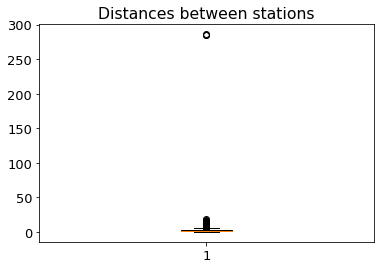

In [32]:
fig, ax = plt.subplots()
ax.boxplot(df4.distance )
ax.set_title('Distances between stations')
plt.show()

In [33]:
df4[df4['distance'] >50]

,start_station_id,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,distance
27010,349,280,55.955083,-3.223634,53.395525,-2.990138,285.094454
27013,357,280,55.963995,-3.185189,53.395525,-2.990138,285.965352
27184,189,280,55.950109,-3.190258,53.395525,-2.990138,284.436975


![title](img/route.png)

After filtering out these outliers, the rest of the data looks much more reasonable. However, there are cases, when the starting station is the same as the ending station. That means the rent was "activated" and then closed imediately.


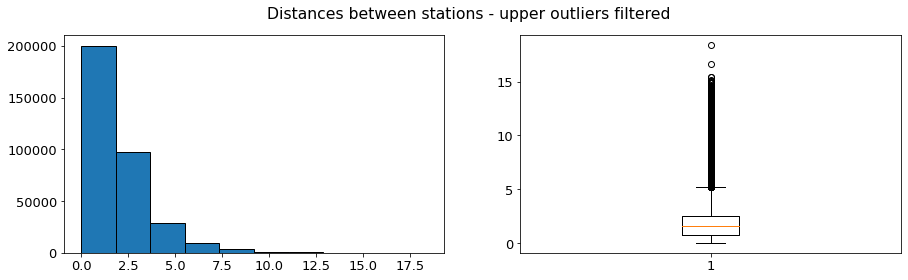

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
df4[df4['distance'] <50].distance.hist(ax=ax[0], **common_kwargs)
ax[1].boxplot(df4[df4['distance'] <50].distance)
fig.suptitle('Distances between stations - upper outliers filtered')
plt.show()

In [35]:
df4[(df4['distance'] == 0)]

,start_station_id,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,distance
9,264,264,55.939963,-3.171586,55.939963,-3.171586,0.0
14,189,189,55.950109,-3.190258,55.950109,-3.190258,0.0
15,189,189,55.950109,-3.190258,55.950109,-3.190258,0.0
16,257,257,55.957004,-3.116888,55.957004,-3.116888,0.0
17,189,189,55.950109,-3.190258,55.950109,-3.190258,0.0
...,...,...,...,...,...,...,...
340955,256,256,55.953164,-3.181682,55.953164,-3.181682,0.0
340973,256,256,55.953164,-3.181682,55.953164,-3.181682,0.0
340978,247,247,55.952335,-3.207101,55.952335,-3.207101,0.0
340979,247,247,55.952335,-3.207101,55.952335,-3.207101,0.0


Checking whether cases with zero travelled distance have same starting and ending station:

In [36]:
df4[(df4['distance'] == 0) &(df4['start_station_id'] != df4['end_station_id'])]

,start_station_id,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,distance


We can as well filter these cases easily. We can see that the distribution is still strongly right-skewed. That makes sense, since usual trip on the rental bike would probably be just around the city centre or surrounding areas, not all-day long trips.

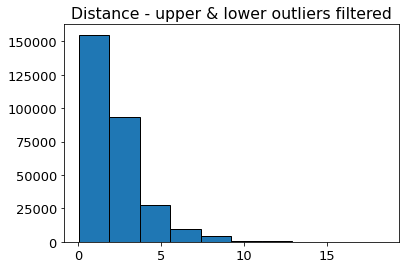

In [37]:
fig, ax = plt.subplots()
df4[(df4['distance'] > 0) & (df4['distance'] < 25)].distance.hist(ax=ax, **common_kwargs)
ax.set_title('Distance - upper & lower outliers filtered')
plt.show()

## 5) What is the usual duration of a bike trip ?

At first, we are going to compute the usual duration from "started_at" and "ended_at" columns. 

In [38]:
df5 = df[['started_at', 'ended_at']]
df5

,started_at,ended_at
0,2018-09-15 08:52:05,2018-09-15 09:11:48
1,2018-09-15 09:24:33,2018-09-15 09:41:09
2,2018-09-15 09:48:54,2018-09-15 10:46:40
3,2018-09-16 12:01:36,2018-09-16 12:25:26
4,2018-09-16 12:03:43,2018-09-16 12:11:16
...,...,...
340981,2020-10-30 23:27:35,2020-10-30 23:38:40
340982,2020-10-30 23:33:50,2020-10-30 23:40:02
340983,2020-10-30 23:38:57,2020-10-30 23:43:33
340984,2020-10-30 23:41:26,2020-10-30 23:50:44


We create the "timedelta" values, created by subtracting the starting time from end time. Then, we extract just the minute part of the values - Pandas makes such operations really simple.

In [39]:
df5['total_time'] = df5['ended_at'] - df5['started_at']
minutes = df5['total_time'].astype('timedelta64[m]').sort_values()
df5

,started_at,ended_at,total_time
0,2018-09-15 08:52:05,2018-09-15 09:11:48,0 days 00:19:43
1,2018-09-15 09:24:33,2018-09-15 09:41:09,0 days 00:16:36
2,2018-09-15 09:48:54,2018-09-15 10:46:40,0 days 00:57:46
3,2018-09-16 12:01:36,2018-09-16 12:25:26,0 days 00:23:50
4,2018-09-16 12:03:43,2018-09-16 12:11:16,0 days 00:07:33
...,...,...,...
340981,2020-10-30 23:27:35,2020-10-30 23:38:40,0 days 00:11:05
340982,2020-10-30 23:33:50,2020-10-30 23:40:02,0 days 00:06:12
340983,2020-10-30 23:38:57,2020-10-30 23:43:33,0 days 00:04:36
340984,2020-10-30 23:41:26,2020-10-30 23:50:44,0 days 00:09:18


By examining the values, we can notice distant outliers:

In [40]:
minutes

92598         1.0
277059        1.0
5354          1.0
196477        1.0
123936        1.0
           ...   
138878    18739.0
127456    19647.0
136551    21628.0
137973    22230.0
137144    22884.0
Name: total_time, Length: 340986, dtype: float64

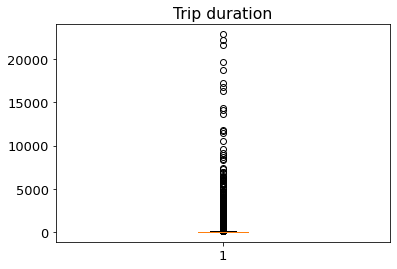

In [41]:
fig, ax = plt.subplots()
ax.boxplot(minutes)
ax.set_title('Trip duration')
plt.show()

In [42]:
minutes.describe()

count    340986.000000
mean         33.871918
std         145.062138
min           1.000000
25%          10.000000
50%          19.000000
75%          41.000000
max       22884.000000
Name: total_time, dtype: float64

 To understand the data, I applied a filter based on Interquartile range (IQR). For such task, custom function was created. It basically takes only the data inside the quartiles, multiplied by 1.5. After that, usual Pandas filtering for DataFrames is used.

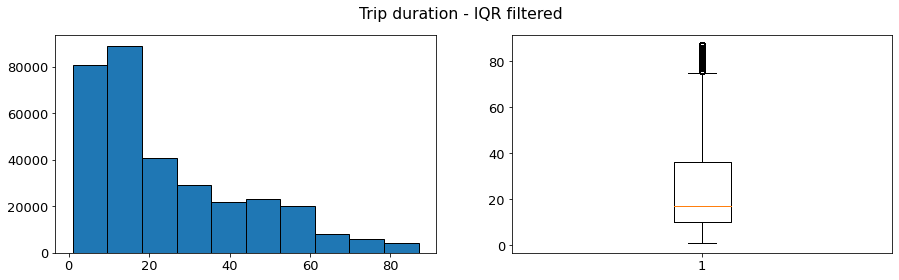

In [43]:
def filt_min(data):

    outliers_below = data.quantile(.25) - 1.5*iqr(data)
    outliers_above = data.quantile(.75) + 1.5*iqr(data)
    mask = (data > outliers_below) & (data < outliers_above) 

    filtered_minutes = data[mask]
    
    return filtered_minutes


filtered_minutes = filt_min(minutes)

fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(filtered_minutes, edgecolor='black')
ax[1].boxplot(filtered_minutes)
plt.suptitle('Trip duration - IQR filtered')
plt.show()

Results seems much more understandable now. As we see, The majority of trips takes under 40 minutes. That sounds reasonable - people don't usually rent city bikes for long trips.

We can of course obtain this information using "duration" column in original DataFrame. Only thing we need to do is convert default seconds into minutes - simply by dividing each columnn's value by 60. Then we can compare the results with previous "custom ones" - they are almost the same ,so the "duration" column is probably derrived from the "started_at" and "ended_at" columns, when a new observation is added to the dataset.

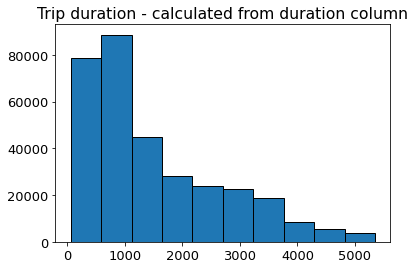

In [44]:
fig, ax = plt.subplots()
filtered_minutes = filt_min(df['duration'])
ax.hist(filtered_minutes, edgecolor='black')
ax.set_title('Trip duration - calculated from duration column')
plt.show()

## 6) Inspect demand for bikes over company lifetime 


In this part, we are going to solve the task in terms of days and months. DataFrame is filtered by converting datetime values to corresponding measures, then counts of each unique value is calculated.

In [45]:
df6_d = df['started_at'].dt.strftime('%Y-%m-%d')
df6_m = df['started_at'].dt.strftime('%Y-%m')

As we can see, there is an upward trend. Over the years, the comapny is succesful at increasing their activities.

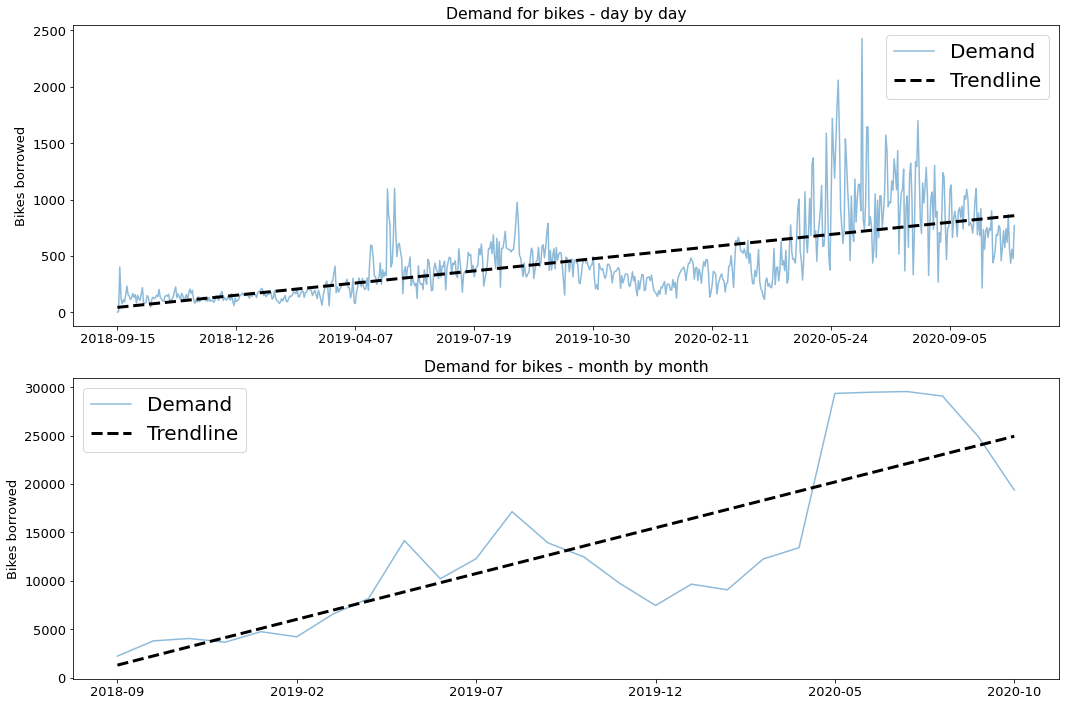

In [46]:
def find_trendline(y_values):
    
    x_values = np.linspace(0,1,len(y_values))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    
    return y_hat


fig, ax = plt.subplots(2,1, figsize = (15,10))

#underlying data - day by day
df6_d.value_counts().sort_index().plot(ax=ax[0], alpha=0.5, label='Demand')

#trend line fit
dates_d = df6_d.value_counts().sort_index().index
y_values_d = df6_d.value_counts().sort_index().values
y_hat_d = find_trendline(y_values_d)
ax[0].plot(dates_d,y_hat_d,linestyle='dashed', color='black', linewidth=3, label='Trendline')

#underlying data - month by month
df6_m.value_counts().sort_index().plot(ax=ax[1], alpha=0.5, label='Demand')

#trend line fit
dates_m = df6_m.value_counts().sort_index().index
y_values_m = df6_m.value_counts().sort_index().values
y_hat_m = find_trendline(y_values_m)
ax[1].plot(dates_m,y_hat_m,linestyle='dashed', color='black', linewidth=3, label='Trendline')

# legends, titles
ax[0].set_title('Demand for bikes - day by day')
ax[0].legend(prop={'size': 20})
ax[0].set_ylabel('Bikes borrowed')
ax[1].set_title('Demand for bikes - month by month')
ax[1].legend(prop={'size': 20})
ax[1].set_ylabel('Bikes borrowed')
plt.tight_layout()
plt.show()

## 7) Identify causes of demand's volatility

From the plot lines above, we can see that the peak of demand occurs at summer months. At these periods, people tend to spend more time outdoors, taking vacations and travelling - this would be possible explanation of examined trends. On the other hand, the winter 2019 came up with significant drop in demand, which makes sense.

##  8) Inspect the effect of weather on demand for bikes

At first, we need to obtain weather data from the sql database. We use the same approach using sqlalchemy library, as in the beginning of this notebook.

In [47]:
# # Load weather data

conn_string = "mysql+pymysql://student:p7@vw7MCatmnKjy7@data.engeto.com/data"
alchemy_conn = sqlalchemy.create_engine(conn_string)

query = """select * from edinburgh_weather"""
weather = pd.read_sql(query, alchemy_conn)
weather.to_csv('weather.csv')

In [48]:
weather.head(20)

,time,temp,feels,wind,gust,rain,humidity,cloud,pressure,vis,date
0,00:00,11 °c,11 °c,9 km/h from S,19 km/h,0.0 mm,79%,13%,1020 mb,Excellent,2018-09-01
1,03:00,13 °c,12 °c,11 km/h from SSW,19 km/h,0.0 mm,76%,96%,1020 mb,Excellent,2018-09-01
2,06:00,14 °c,13 °c,11 km/h from SSW,19 km/h,0.0 mm,84%,100%,1020 mb,Excellent,2018-09-01
3,09:00,14 °c,13 °c,14 km/h from SSW,23 km/h,0.1 mm,88%,78%,1021 mb,Excellent,2018-09-01
4,12:00,16 °c,16 °c,15 km/h from SSW,22 km/h,0.0 mm,87%,87%,1021 mb,Excellent,2018-09-01
5,15:00,17 °c,17 °c,14 km/h from SW,21 km/h,0.0 mm,83%,97%,1021 mb,Excellent,2018-09-01
6,18:00,16 °c,16 °c,12 km/h from SW,19 km/h,0.0 mm,88%,98%,1022 mb,Excellent,2018-09-01
7,21:00,14 °c,14 °c,11 km/h from SSW,19 km/h,0.0 mm,94%,52%,1022 mb,Excellent,2018-09-01
8,00:00,13 °c,13 °c,10 km/h from SSW,19 km/h,0.0 mm,95%,31%,1022 mb,Poor,2018-09-02
9,03:00,13 °c,13 °c,8 km/h from SSW,15 km/h,0.0 mm,96%,52%,1020 mb,Poor,2018-09-02


As we can see, all loaded values are object datatypes. I didn't find convenient way to use parser in this case, so I created custom function to transfer the data to useful format:

In [49]:
weather.dtypes

time        object
temp        object
feels       object
wind        object
gust        object
rain        object
humidity    object
cloud       object
pressure    object
vis         object
date        object
dtype: object

In [50]:
def extract_num(string):
    
    if '%' in string:
        string = string.replace('%','')
        
    if string in ['Excellent', 'Poor', 'Good', 'Average']:
        return string
    
    obj  = float(string.split(' ')[0])
    return obj

As shown below, we converted almost all the columns into numerical variables. Categorical "vis" variable (visibility) will be handled in the following parts.

In [51]:
w_df = weather.drop(columns=['time','date']).applymap(lambda x: extract_num(x))

w_df['time'] = pd.to_datetime(weather['time'], format='%H:%M').dt.hour
w_df['date'] = pd.to_datetime(weather['date'])
w_df

,temp,feels,wind,gust,rain,humidity,cloud,pressure,vis,time,date
0,11.0,11.0,9.0,19.0,0.0,79.0,13.0,1020.0,Excellent,0,2018-09-01
1,13.0,12.0,11.0,19.0,0.0,76.0,96.0,1020.0,Excellent,3,2018-09-01
2,14.0,13.0,11.0,19.0,0.0,84.0,100.0,1020.0,Excellent,6,2018-09-01
3,14.0,13.0,14.0,23.0,0.1,88.0,78.0,1021.0,Excellent,9,2018-09-01
4,16.0,16.0,15.0,22.0,0.0,87.0,87.0,1021.0,Excellent,12,2018-09-01
...,...,...,...,...,...,...,...,...,...,...,...
6331,14.0,12.0,21.0,33.0,0.4,86.0,100.0,993.0,Poor,9,2020-10-31
6332,14.0,12.0,24.0,37.0,0.4,88.0,94.0,987.0,Poor,12,2020-10-31
6333,10.0,6.0,42.0,55.0,0.5,75.0,100.0,989.0,Excellent,15,2020-10-31
6334,9.0,5.0,38.0,54.0,0.0,76.0,79.0,994.0,Excellent,18,2020-10-31


In [52]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   temp      6336 non-null   float64       
 1   feels     6336 non-null   float64       
 2   wind      6336 non-null   float64       
 3   gust      6336 non-null   float64       
 4   rain      6336 non-null   float64       
 5   humidity  6336 non-null   float64       
 6   cloud     6336 non-null   float64       
 7   pressure  6336 non-null   float64       
 8   vis       6336 non-null   object        
 9   time      6336 non-null   int64         
 10  date      6336 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 544.6+ KB


Then we group the DataFrame by days, using mean aggregation. This results in DataFrame containing average values of all numerical variables for each day:

In [53]:
w_df_grouped = w_df.groupby('date').mean().drop(columns='time')
w_df_grouped

,temp,feels,wind,gust,rain,humidity,cloud,pressure
date,,,,,,,,
2018-09-01,14.375,14.000,12.125,20.125,0.0125,84.875,77.625,1020.875
2018-09-02,16.500,16.625,12.875,21.000,0.0500,87.875,70.625,1019.875
2018-09-03,11.875,11.500,8.625,13.125,0.0375,87.625,70.750,1023.250
2018-09-04,11.250,13.375,5.000,6.750,0.0000,75.125,6.750,1024.375
2018-09-05,12.500,12.625,9.375,14.125,0.0500,79.750,27.250,1022.125
...,...,...,...,...,...,...,...,...
2020-10-27,7.125,4.625,15.250,22.375,0.1250,86.250,54.125,988.625
2020-10-28,7.250,3.500,24.500,34.000,0.1500,83.625,87.500,990.125
2020-10-29,6.750,5.250,16.875,26.625,1.2625,87.500,84.625,999.000


In the next step, we group the data in from the original DataFrame. We want to get counts of each day's occurence in the table. Resulting DataFrame could be then joined with weather DataFrame, so we can find the answers we are looking for.

In [54]:
temp_df = pd.DataFrame(df['started_at'].dt.date)
temp_df['counts'] = 1
temp_df = (temp_df.groupby('started_at')
           .count()
#            .rename(index={'started_at':'date'})         
          )
temp_df.index.names = ['date']
temp_df

,counts
date,
2018-09-15,3
2018-09-16,10
2018-09-17,403
2018-09-18,126
2018-09-19,77
...,...
2020-10-26,560
2020-10-27,437
2020-10-28,559


Following command executes the joining process - inner join is used to eliminate possible null values. We have enough datapoints for creating dense scatterplots, so this step is feasible. Joined DataFrame is displayed below:

In [55]:
final_df  = w_df_grouped.join(temp_df, how='inner')
final_df

,temp,feels,wind,gust,rain,humidity,cloud,pressure,counts
date,,,,,,,,,
2018-09-15,10.500,8.500,14.875,23.500,0.1250,83.875,58.125,1017.375,3
2018-09-16,12.875,10.625,26.500,43.125,0.1250,81.500,79.500,1008.875,10
2018-09-17,13.875,13.125,18.000,29.875,0.0250,83.000,66.125,1006.375,403
2018-09-18,14.125,13.500,16.875,28.500,0.2375,86.875,57.750,996.125,126
2018-09-19,11.750,8.625,34.750,55.625,0.3625,75.750,52.250,995.875,77
...,...,...,...,...,...,...,...,...,...
2020-10-26,8.500,5.750,18.000,26.375,0.1625,83.750,67.375,986.500,560
2020-10-27,7.125,4.625,15.250,22.375,0.1250,86.250,54.125,988.625,437
2020-10-28,7.250,3.500,24.500,34.000,0.1500,83.625,87.500,990.125,559


We can get a quick overview of weather effects using pairplot. As we can see, there is no strong correlation, but at some cases the underlying trend is obvious.

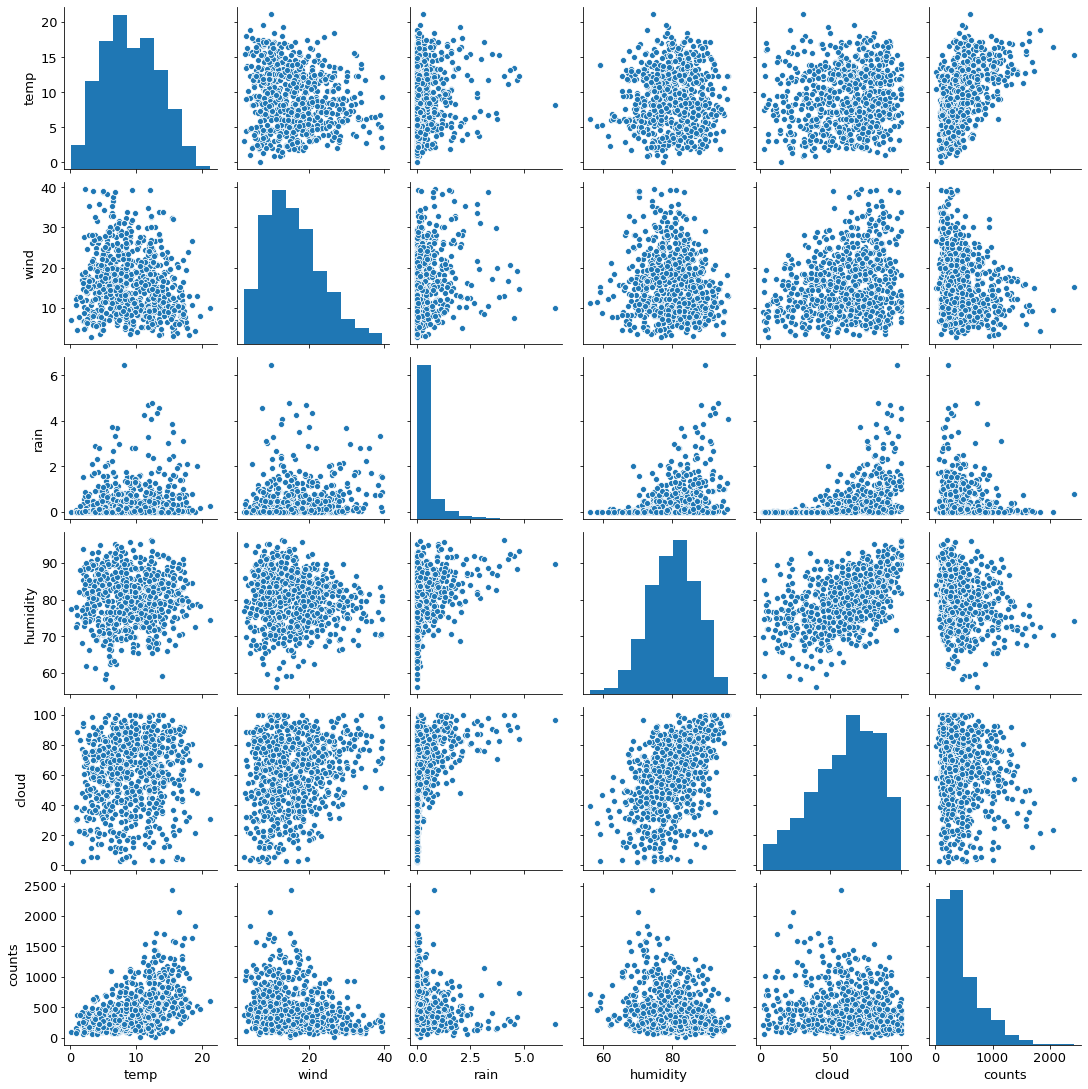

In [56]:
sns.pairplot(final_df[['temp', 'wind','rain','humidity','cloud','counts']])
plt.show()

The first example is the relationship between temperature and number of rented bikes. The figure below shows that people tend to use bikes more likely when the temperature is higher.

Second figure displays the relationship between wind and number of rented bikes, with slight downwards trend.

The third case seems not as obvious as previous ones. We can see that the majority of underlying points is clustered around zero amount of rain - in this case, the linear trend may not be the best aproximation.
Hovewer, the effect of rain seems pretty obvious. If it rains, a lot less people would use bikes for transportation. Even with just a little rain, it is much less likely that people will be cycling.

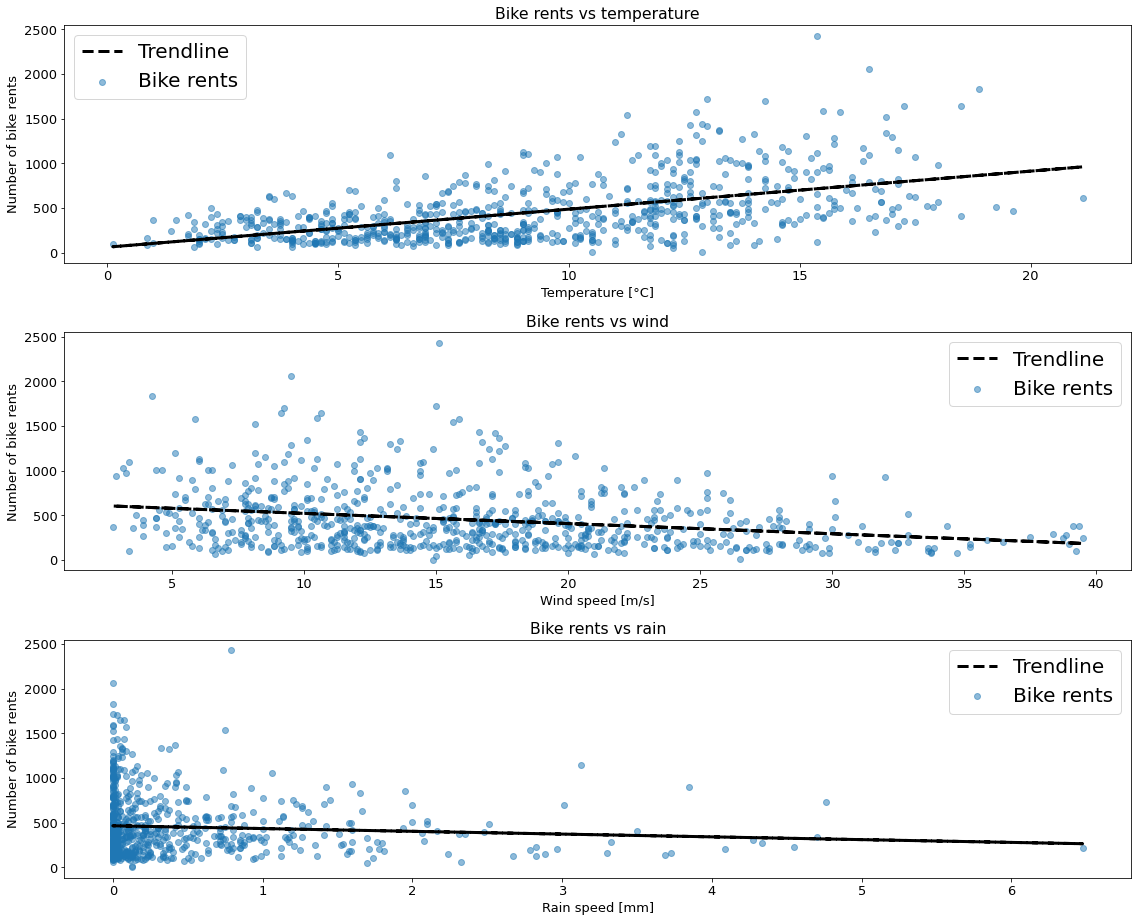

In [57]:
def fit_trend_weather(sample, target):
    coeffs = np.polyfit(sample, target, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(sample)
    
    return y_hat
    

fig, ax = plt.subplots(3,1, figsize=(16,13))

ax[0].scatter(final_df.temp, final_df.counts, label = 'Bike rents', alpha=0.5)
ax[1].scatter(final_df.wind, final_df.counts, label = 'Bike rents', alpha=0.5)
ax[2].scatter(final_df.rain, final_df.counts, alpha=0.5, label = 'Bike rents')

y_hat_temp = fit_trend_weather(final_df.temp, final_df.counts)
y_hat_wind = fit_trend_weather(final_df.wind, final_df.counts)
y_hat_rain = fit_trend_weather(final_df.rain, final_df.counts)

ax[0].plot(final_df.temp, y_hat_temp, color = 'black', linestyle='dashed', linewidth=3, label='Trendline')
ax[1].plot(final_df.wind, y_hat_wind, color = 'black', linestyle='dashed', linewidth=3, label='Trendline')
ax[2].plot(final_df.rain, y_hat_rain, color = 'black', linestyle='dashed', linewidth=3, label='Trendline')

ax[0].set_title('Bike rents vs temperature')
ax[1].set_title('Bike rents vs wind')
ax[2].set_title('Bike rents vs rain')

ax[0].set_xlabel('Temperature [°C]')
ax[0].set_ylabel('Number of bike rents')
ax[1].set_xlabel('Wind speed [m/s]')
ax[1].set_ylabel('Number of bike rents')
ax[2].set_xlabel('Rain speed [mm]')
ax[2].set_ylabel('Number of bike rents')

for i in range(3):
    ax[i].legend(prop={'size': 20})
fig.tight_layout()
plt.show()

Figure below shows the numbers of bike uses throughout shorter period. We can see significant drop in closed rents. If we examine weather at displayed days, we can notice that July 6th had just a little rain. In comparison, July 7th was rainy day - the drop in bike uses is obvious. This observation goes along with insights from scatterplots above.

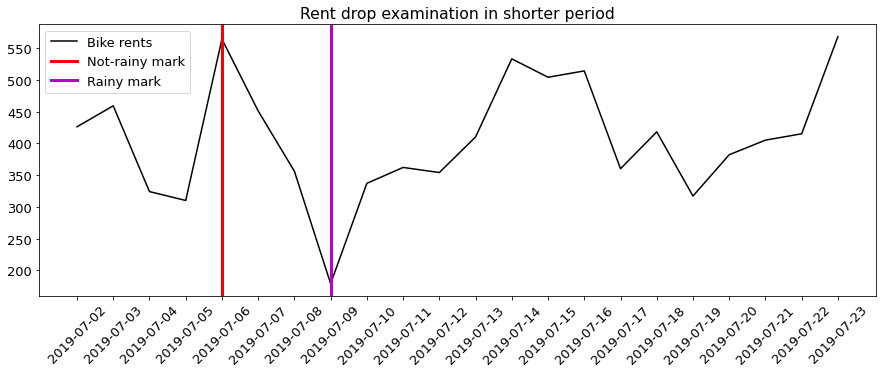

In [58]:
detail = df6_d[(df6_d > '2019-07-01') & (df6_d < '2019-07-24' )].value_counts().sort_index()

# plt.figure(figsize=(15,5))
# plt.xticks(np.arange(min(detail), max(detail)+1, 1.0))
# detail.plot()

plt.figure(figsize=(15,5))
plt.title('Rent drop examination in shorter period')
plt.xticks(rotation=45)
plt.plot(detail, color='k', label='Bike rents')
plt.axvline('2019-07-06', linewidth=3, color='r', label='Not-rainy mark')
plt.axvline('2019-07-09', linewidth=3, color='m', label='Rainy mark')
plt.legend()
plt.show()

In [59]:
final_df.loc['2019-07-09']

temp          13.2500
feels         12.8750
wind          13.2500
gust          18.2500
rain           1.8125
humidity      91.8750
cloud         96.8750
pressure    1018.0000
counts       179.0000
Name: 2019-07-09 00:00:00, dtype: float64

In [60]:
final_df.loc['2019-07-06']

temp          13.3750
feels         12.3750
wind          10.3750
gust          16.0000
rain           0.0375
humidity      71.6250
cloud         45.6250
pressure    1013.6250
counts       564.0000
Name: 2019-07-06 00:00:00, dtype: float64

The visibility variable is categorical variable, so it's useful to use bar chart examine its efects. After grouping the data by this variable, we obtain unique values along with number of occurences in the weather dataset. We can see that most of the day's visibility was determined as excellent.

In [61]:
weather.vis.unique()

array(['Excellent', 'Poor', 'Good', 'Average'], dtype=object)

In [62]:
vis_df = (w_df[['vis','date']]
          .groupby('date')
          .agg(lambda x: x
               .value_counts()
               .index[0])
         )
vis_df

,vis
date,
2018-09-01,Excellent
2018-09-02,Poor
2018-09-03,Excellent
2018-09-04,Excellent
2018-09-05,Excellent
...,...
2020-10-27,Excellent
2020-10-28,Excellent
2020-10-29,Excellent


In [63]:
w_df['vis'].value_counts()

Excellent    5626
Poor          379
Good          324
Average         7
Name: vis, dtype: int64

Next step is joining the number of occurences of each visibility category with our custom weather table from previous parts. 
Then we can sum counts of bike uses for each of unique label of "vis" category. 

In [64]:
df7 = final_df.join(vis_df, how='inner')
df7

,temp,feels,wind,gust,rain,humidity,cloud,pressure,counts,vis
date,,,,,,,,,,
2018-09-15,10.500,8.500,14.875,23.500,0.1250,83.875,58.125,1017.375,3,Excellent
2018-09-16,12.875,10.625,26.500,43.125,0.1250,81.500,79.500,1008.875,10,Excellent
2018-09-17,13.875,13.125,18.000,29.875,0.0250,83.000,66.125,1006.375,403,Excellent
2018-09-18,14.125,13.500,16.875,28.500,0.2375,86.875,57.750,996.125,126,Excellent
2018-09-19,11.750,8.625,34.750,55.625,0.3625,75.750,52.250,995.875,77,Excellent
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,8.500,5.750,18.000,26.375,0.1625,83.750,67.375,986.500,560,Excellent
2020-10-27,7.125,4.625,15.250,22.375,0.1250,86.250,54.125,988.625,437,Excellent
2020-10-28,7.250,3.500,24.500,34.000,0.1500,83.625,87.500,990.125,559,Excellent


In [65]:
df7 = df7[['counts', 'vis']].groupby('vis').sum()
df7

,counts
vis,
Excellent,332011
Good,3571
Poor,5404


As we can see, when the visibility is poor, it's much less likely for our bikes to be used. On the other hand, such visibility determination seems more like subjective measurement, so it's hard to say whether this variable can be considered as reliable one.  

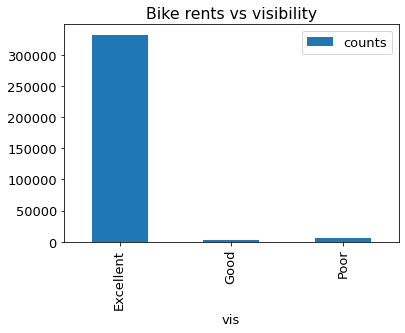

In [66]:
fig, ax = plt.subplots()
df7.plot.bar(ax=ax)
ax.set_title('Bike rents vs visibility')
plt.show()

## 9) Do people tend to rent bike at the weekend more likely than during the rest of the week ?

The soultion of this task is straightforward. From the initial DataFrame, we extract values from date column ("started_at would be enough") and use it in more sufficient format. Then we can set the weekend column, resulting in 1 if the particular day is weekday, or 0 if the day is in the rest of the week. This conditional determination can be easily done by .where method of numpy library.

In [67]:
df8 = df['started_at'].dt.strftime('%Y-%m-%d').to_frame()
df8['started_at'] = pd.to_datetime(df8['started_at'])
df8

,started_at
0,2018-09-15
1,2018-09-15
2,2018-09-15
3,2018-09-16
4,2018-09-16
...,...
340981,2020-10-30
340982,2020-10-30
340983,2020-10-30
340984,2020-10-30


In [68]:
df8['weekend'] = np.where(df8['started_at'].dt.dayofweek.isin([5,6]), 1, 0)
df8

,started_at,weekend
0,2018-09-15,1
1,2018-09-15,1
2,2018-09-15,1
3,2018-09-16,1
4,2018-09-16,1
...,...,...
340981,2020-10-30,0
340982,2020-10-30,0
340983,2020-10-30,0
340984,2020-10-30,0


After that, we display results grouped by the condition above. The use of bikes is higher during Monday-Friday - maybe people use our bikes even for transfer to thei jobs. Or maybe this difference is just due to comparing 2 weekend days vs 5 working days, and people rent bikes no matter the part of week.

In [69]:
df8.groupby('weekend').count().rename(columns={'started_at':'count'})

,count
weekend,
0,235188
1,105798


## 10) Identify the busiest rental stations on the map of Edinburgh

Now we try to find the location of most used stations on the map. First we need to remind ourselves the stations with highest activity. We pick 10 most active stations to be displayed.

In [70]:
overall_freq

1857        1
242         2
280         3
1740        3
241         5
        ...  
259     17315
248     17671
1728    18127
250     19619
265     24086
Length: 200, dtype: int64

In [71]:
top_stations = overall_freq.reset_index().iloc[-10:,:]['index'].values
top_stations

array([1824,  289, 1024,  358,  262,  259,  248, 1728,  250,  265],
      dtype=int64)

In [72]:
top_stations_df = (df.loc[df['start_station_id']
                                 .isin(top_stations)][['start_station_id','start_station_latitude', 'start_station_longitude']]
                          .drop_duplicates('start_station_id')
                         )
top_stations_df

,start_station_id,start_station_latitude,start_station_longitude
1,259,55.954749,-3.192774
2,262,55.962804,-3.196284
12,265,55.939809,-3.182739
55,248,55.946004,-3.188665
78,250,55.977638,-3.174116
5310,289,55.951501,-3.203184
11490,358,55.965040,-3.176686
73781,1024,55.940238,-3.194640
114872,1728,55.957915,-3.118332
146938,1824,55.969012,-3.167395


For visualisation, we will use just the cooridnates: 

In [73]:
top_stations_loc = top_stations_df[['start_station_latitude', 'start_station_longitude']]
top_stations_loc

,start_station_latitude,start_station_longitude
1,55.954749,-3.192774
2,55.962804,-3.196284
12,55.939809,-3.182739
55,55.946004,-3.188665
78,55.977638,-3.174116
5310,55.951501,-3.203184
11490,55.965040,-3.176686
73781,55.940238,-3.194640
114872,55.957915,-3.118332
146938,55.969012,-3.167395


Now we use gmaps library to connect this notebook with google maps. We set the lattitudal and longitudal coordinates as the center of view window and set aproppriate zoom parameter. To display station as points on the map, we have to create layers to be added on the udnerlying map in view window. Resulting dots are clearly visible on the map below. The blue dot represents the most active station, the rest of the top 10 stations are marked as red.

In [78]:
import gmaps

## generate your own API key to display the map correctly: https://jupyter-gmaps.readthedocs.io/en/latest/authentication.html
gmaps.configure(api_key='xxxx')
edinburgh_coordinates = (55.950558,-3.185556)
most_freq_station = top_stations_df.loc[
    top_stations_df['start_station_id'] == 265][['start_station_latitude', 'start_station_longitude']]

stations_layer = gmaps.symbol_layer(
    top_stations_loc, fill_color='red', stroke_color='red', scale=6
)

most_freq_station_layer = gmaps.symbol_layer(
    most_freq_station, fill_color='blue', stroke_color='blue', scale=6
)

fig = gmaps.figure(center=edinburgh_coordinates, zoom_level=12)
fig.add_layer(stations_layer)
fig.add_layer(most_freq_station_layer)
fig

Figure(layout=FigureLayout(height='420px'))

## 11) Inspect the demand for bikes throughout the day

Last part describes occupation of the most active station throughout a particular day. First we filter the initial DataFrame to get rows with data of station 265 only. Then we format the date column to get just hours in the day. Then we can easily count the number of observations for particular hour.

In [75]:
occupance_by_hour = df.loc[df['start_station_id'] == 265]['started_at'].dt.hour
occupance_by_hour

12        13
69        10
83        11
96        11
127       12
          ..
340903    20
340907    20
340908    20
340953    22
340980    23
Name: started_at, Length: 12715, dtype: int64

In [76]:
hours_vs_rents = occupance_by_hour.value_counts().sort_index()
hours_vs_rents

0      159
1      106
2       78
3       52
4       68
5       97
6      159
7      521
8      776
9      741
10     736
11     803
12     905
13     909
14     819
15     871
16     934
17    1012
18     804
19     537
20     492
21     456
22     390
23     290
Name: started_at, dtype: int64

Resulting plot does not look surprising. During nighttime, there is a lot less bike rents. People tend to ride bikes thorughout the day more likely. 

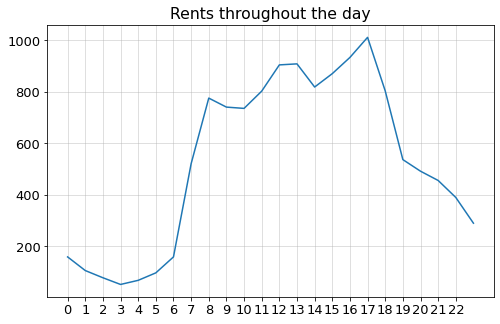

In [77]:
fig, ax = plt.subplots(figsize=(8,5))
hours = np.arange(0,23)
ax.plot(hours_vs_rents)
ax.set_xticks(hours)
ax.grid(alpha = 0.5)
ax.set_title('Rents throughout the day')
plt.show()